<a href="https://colab.research.google.com/github/AnuragSingla911/PythonStudy/blob/master/ml/Naive_Studynotebooks_SMS%2BClassifier%2B_%2BBernoulli%2BNB_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

In [1]:
from google.colab import files
uploaded = files.upload()

Saving smsspamcollection.csv to smsspamcollection.csv


In [2]:
import pandas as pd
docs = pd.read_csv('smsspamcollection.csv', header=None, names=['Class', 'sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
docs.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [ ]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.406317300789663


In [5]:
# mapping labels to 1 and 0
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [ ]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=docs.sms
y=docs.label

In [ ]:
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)

(5572,)


In [7]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [10]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [ ]:
vect.vocabulary_

{'shocking': 5675,
 'moan': 4243,
 'immed': 3381,
 'youwanna': 7177,
 'collected': 1783,
 'steed': 6012,
 '150p16': 294,
 'current': 1996,
 'female': 2629,
 'eightish': 2400,
 'das': 2043,
 '08719181503': 145,
 '8wp': 698,
 'soon': 5868,
 'mad1': 4022,
 'effects': 2391,
 'sometext': 5853,
 'woah': 7034,
 'manage': 4053,
 'obedient': 4546,
 'caught': 1587,
 'edu': 2383,
 'proper': 5078,
 'o2': 4544,
 'prescripiton': 5009,
 'lovly': 3965,
 'lakhs': 3736,
 'deluxe': 2111,
 'wamma': 6851,
 'suite342': 6133,
 'excellent': 2513,
 '〨ud': 7203,
 'kaiez': 3631,
 'tell': 6289,
 'puttin': 5125,
 'refund': 5267,
 'tirunelvali': 6429,
 '08701417012': 74,
 'ipaditan': 3486,
 '69988': 584,
 'm95': 4008,
 'blow': 1311,
 'takes': 6230,
 'company': 1812,
 'deltomorrow': 2110,
 'searching': 5553,
 'videosound': 6768,
 'cried': 1959,
 'building': 1458,
 'chaps': 1629,
 'conveying': 1880,
 'tmr': 6443,
 'fault': 2605,
 'jersey': 3566,
 '449050000301': 485,
 'cupboard': 1993,
 '28days': 369,
 'sponsors': 59

In [11]:
vect.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zouk', 'zyada', 'èn'],
      dtype=object)

In [12]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [13]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9770279971284996

In [ ]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [14]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  31,  154]])

In [15]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [16]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [17]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9991721854304636


In [18]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9935483870967742
0.9935483870967742


In [19]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


In [20]:
y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [21]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [22]:
print (roc_auc)

0.9967692858421334


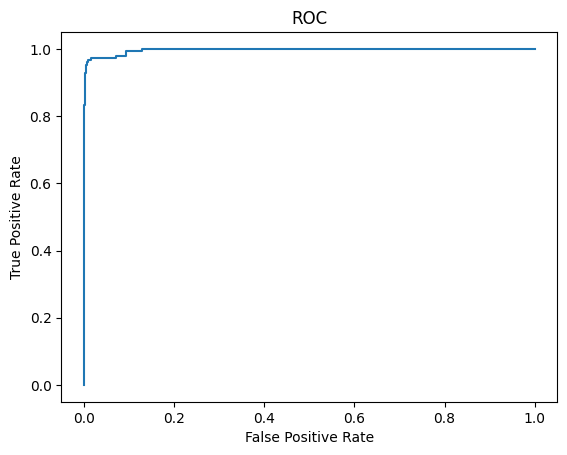

In [23]:
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)